#### 회귀식

##### 단순 선형회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [17]:
# 아버지, 아들 키만 추출
# 컬럼명 Father, Son으로 변경
# 단위 변경 inch -> centi
df.rename(columns={'Height':'Son'}, inplace=True)
df_sub = df[df['Gender']=='M'][['Father','Son']]*2.54


In [18]:
df_sub

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


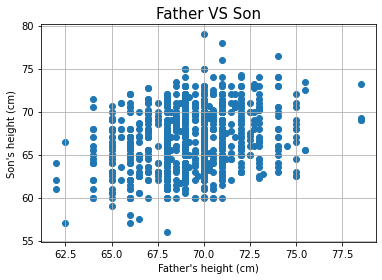

In [20]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father VS Son', fontsize=15)
plt.show()


  - 회귀선 구하여 그리기
     - np.linalg.lstsq()
     - np.polyfit() 

In [29]:
weight, bias = np.polyfit(df.Father, df.Son, 1) # X, Y, 차수
weight, bias

(0.3993812658985591, 39.110386837075744)

In [30]:
np.polyfit(df.Father, df.Son, 2)

array([-1.48560760e-02,  2.46213693e+00, -3.24015552e+01])

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


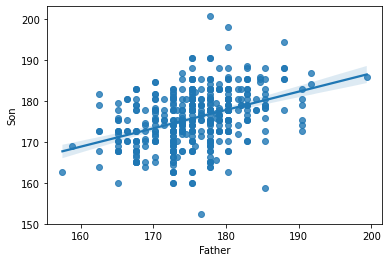

In [32]:
import seaborn as sns
sns.regplot('Father','Son', df_sub)
plt.show()


In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [37]:
# 학습
#lr.fit(df_sub[['Father']], df_sub['Son'])
lr.fit(df_sub.Father.values.reshape(-1,1), df_sub.Son.values)

LinearRegression()

In [41]:
# coefficient(계수)/ weight
lr.coef_

array([0.44774792])

In [42]:
# intercept(절편,편향)/ bias
lr.intercept_

97.17763700739333

In [43]:
# 잔차 제곱의 합(RSS" Residual Sum of Square)
lr._residues

17556.59951549399

In [44]:
# 평가 - R squared
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

-294.0763594429231

In [47]:
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.Son.values, pred)

-294.0763594429231

  - 당뇨병 사례


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# EDA
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [51]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [52]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

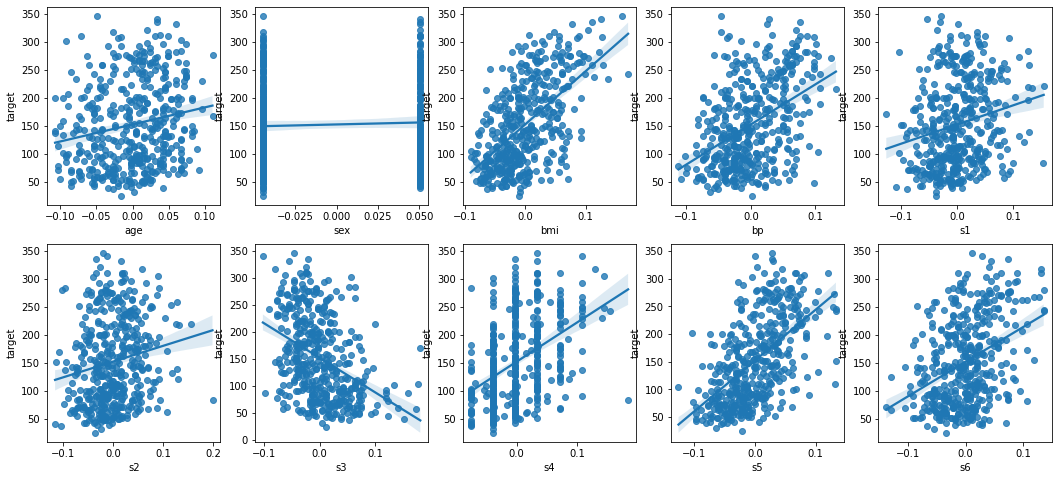

In [57]:
import seaborn as sns
_, axs = plt.subplots(2,5, figsize=(18,8))
for i, feat in enumerate(df.columns[:-1]):
    row, col = i // 5, i % 5
    sns.regplot(x=feat, y='target', data=df, ax = axs[row][col]) 
    

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
# 독립 변수와 종속 변수의 관계
for feat in df.columns[:-1]:
    X = df[feat].values.reshape(-1,1)
    lr.fit(X,diabetes.target)
    score = lr.score(X, diabetes.target)
    print(f'{feat}: {score:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


In [60]:
# BMI와 target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2022
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
# 계수, 절편, 잔차제곱의 합
lr.coef_, lr.intercept_, lr._residues

(array([939.55896022]), 151.79247763803028, 1578990.0125372214)

In [63]:
from sklearn.metrics import r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.46955604545525575

In [64]:
lr.score(X_test,y_test)

0.46955604545525575

In [65]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3127.5719491232644, 55.924698918485596)

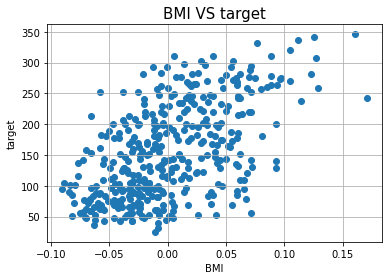

In [66]:
plt.scatter(X_train,y_train)
plt.grid()
plt.xlabel("BMI")
plt.ylabel("target")
plt.title('BMI VS target', fontsize=15)
plt.show()


In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.bp.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2022
)

In [68]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [69]:
pred2 = lr2.predict(X_test2)

In [70]:
r2_score(y_test2, pred2), mean_squared_error(y_test2, pred2)

(-0.035300488435895394, 6104.27687751617)

In [71]:
r2_score(y_test, pred), r2_score(y_test2, pred2)

(0.46955604545525575, -0.035300488435895394)

In [72]:
mean_squared_error(y_test,pred), mean_squared_error(y_test2,pred2)

(3127.5719491232644, 6104.27687751617)